# Compare the reduced spectra with HI4PI
# Analyze the spectra from the inner galaxy to test rotation curve analysis
#### 8/10/21 jpw

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os, glob
import math
from astropy.io import fits
%matplotlib inline

In [2]:
f = glob.glob('spectrum*.txt')
nf = len(f)
lon = np.asarray([int(f[i][12:].split('.')[0]) for i in range(nf)])

In [3]:
# Galactocentric distance and rotation velocity
Rsun = 8.2   # kpc
Vsun = 220   # km/s

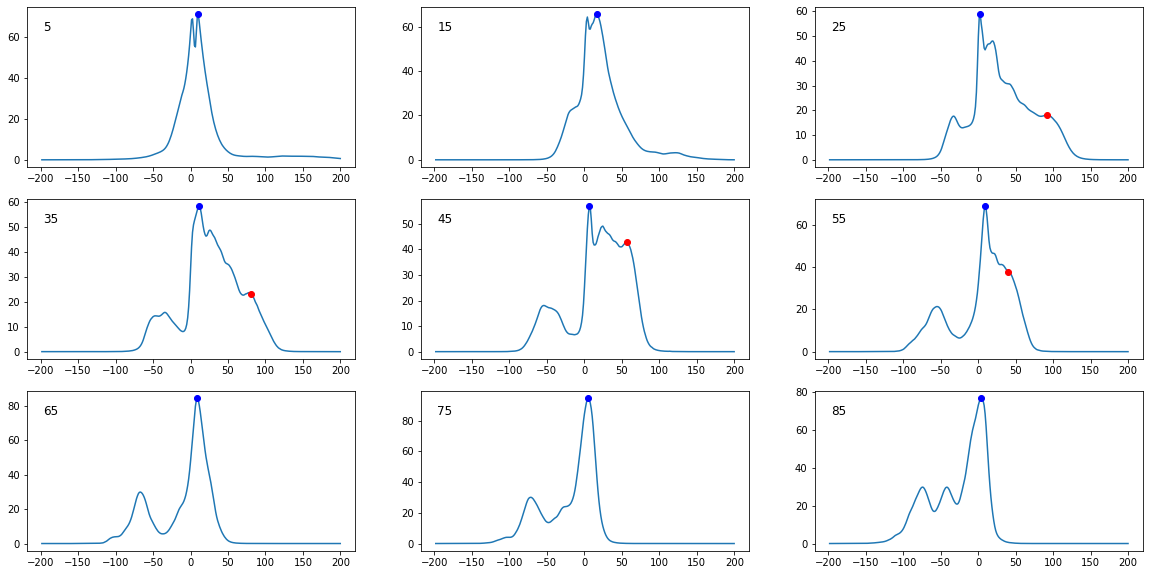

In [11]:
inner1 = np.where(lon<90)[0]
n = len(inner1)
linner1 = lon[inner1]
isort = np.argsort(linner1)

nx = 3
ny = math.ceil(n/nx)
sx = 20
sy = 0.5 * sx * ny / nx
fig = plt.figure(figsize=(sx,sy))

R1 = np.zeros(n)
vmax1 = np.zeros(n)
vrot1 = np.zeros(n)
for j,i in enumerate(isort):
    l1 = linner1[i]
    ax = fig.add_subplot(ny, nx, j+1)
    v, T = np.loadtxt(f[inner1[i]], unpack=True)
    #print(j, i, l1, f[inner1[i]])
    ax.plot(v, T)
    ax.text(0.05, 0.85, str(l1), fontsize=12, transform=ax.transAxes)
    
    # find the maximum
    kmax = np.argmax(T)
    vm = v[kmax]
    ax.plot(vm, T[kmax], 'bo')
    
    # now iterate for the shoulder spectra
    if (l1>20) & (l1<40):
        hi = v > 80
        vhi = v[hi]
        Thi = T[hi]
        k1 = np.argmax(Thi)
        ax.plot(vhi[k1], Thi[k1], 'ro')
        vm = vhi[k1]
        kmax = np.nonzero(hi)[0][0] + k1
    if (l1>40) & (l1<50):
        hi = v > 50
        vhi = v[hi]
        Thi = T[hi]
        k1 = np.argmax(Thi)
        ax.plot(vhi[k1], Thi[k1], 'ro')
        vm = vhi[k1]
        kmax = np.nonzero(hi)[0][0] + k1
    if (l1>50) & (l1<60):
        hi = v > 40
        vhi = v[hi]
        Thi = T[hi]
        k1 = np.argmax(Thi)
        ax.plot(vhi[k1], Thi[k1], 'ro')
        vm = vhi[k1]
        kmax = np.nonzero(hi)[0][0] + k1

        
    R1[j] = Rsun * np.sin(l1 * np.pi / 180)
    #vmax1[j] = vm
    
    # Shane & Bieger-Smith 1966 correction
    dv = v[1] - v[0]
    vmax1[j] = vm + dv*np.sum(T[kmax:])/T[kmax] - dv/2
    vrot1[j] = (vmax1[j]/np.sin(l1*np.pi/180) + Vsun)*R1[j]/Rsun
    
    #print(R1[j], vm, vmax1[j])
    

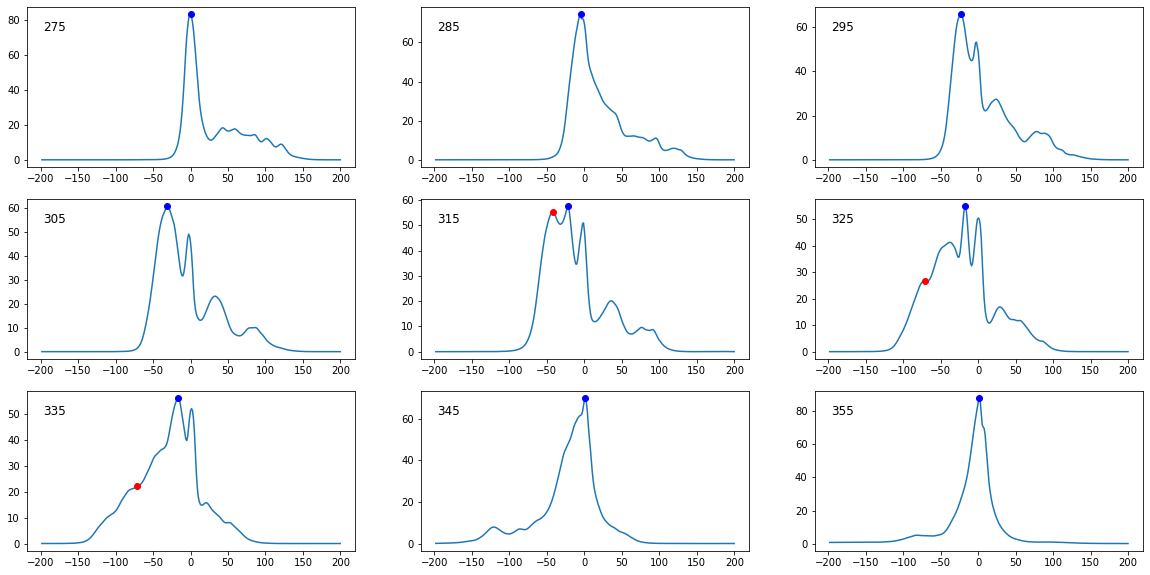

In [12]:
inner2 = np.where(lon>270)[0]
n = len(inner2)
linner2 = lon[inner2]
isort = np.argsort(linner2)

nx = 3
ny = math.ceil(n/nx)
sx = 20
sy = 0.5 * sx * ny / nx
fig = plt.figure(figsize=(sx,sy))

R2 = np.zeros(n)
vmax2 = np.zeros(n)
vrot2 = np.zeros(n)
for j,i in enumerate(isort):
    l2 = linner2[i]
    ax = fig.add_subplot(ny, nx, j+1)
    v, T = np.loadtxt(f[inner2[i]], unpack=True)
    #print(j, i, l2, f[inner2[i]])
    ax.plot(v, T)
    ax.text(0.05, 0.85, str(l2), fontsize=12, transform=ax.transAxes)
    
    # find the maximum
    kmax = np.argmax(T)
    vm = v[kmax]
    ax.plot(vm, T[kmax], 'bo')
    
    # now iterate for the shoulder spectra
    if (l2>310) & (l2<320):
        lo = v < -30
        vlo = v[lo]
        Tlo = T[lo]
        k1 = np.argmax(Tlo)
        ax.plot(vlo[k1], Tlo[k1], 'ro')
        vm = vlo[k1]
        kmax = k1
    if (l2>320) & (l2<340):
        lo = v < -70
        vlo = v[lo]
        Tlo = T[lo]
        k1 = np.argmax(Tlo)
        ax.plot(vlo[k1], Tlo[k1], 'ro')
        vm = vlo[k1]
        kmax = k1
        
    R2[j] = -Rsun * np.sin(l2 * np.pi / 180)
    #vmax2[j] = vm
    
    # Shane & Bieger-Smith 1966 correction
    dv = v[1] - v[0]
    vmax2[j] = vm - dv*np.sum(T[:kmax])/T[kmax] - dv/2
    vrot2[j] = (vmax2[j]/np.sin(l2*np.pi/180) + Vsun)*R2[j]/Rsun
    
    #print(R2[j], vm, vmax2[j])


Text(0, 0.5, 'Vr (km/s)')

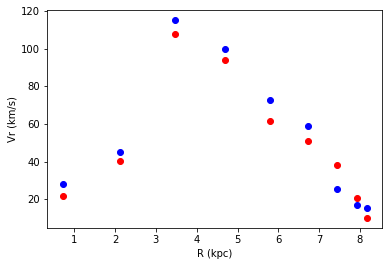

In [13]:
# radial velocity vs radius
plt.plot(R1, vmax1, 'bo')
plt.plot(R2, -vmax2, 'ro')
plt.xlabel('R (kpc)')
plt.ylabel('Vr (km/s)')

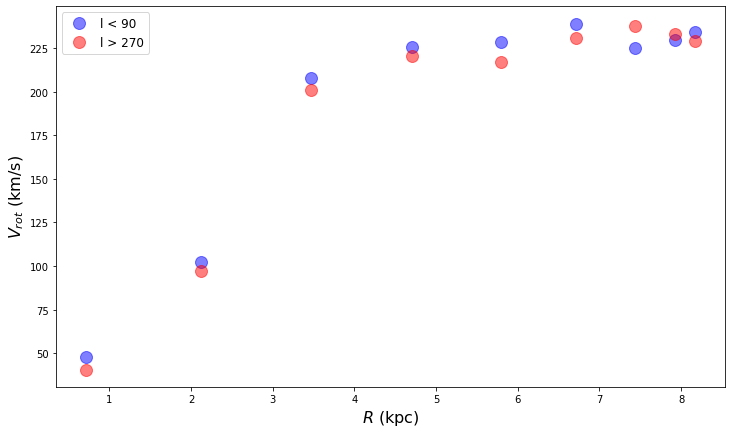

In [22]:
# rotation curve
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111)
ax.plot(R1, vrot1, 'bo', ms=12, alpha=0.5, label='l < 90')
ax.plot(R2, vrot2, 'ro', ms=12, alpha=0.5, label='l > 270')
ax.legend(fontsize=12)
ax.set_xlabel(r'$R$ (kpc)', fontsize=16)
ax.set_ylabel(r'$V_{rot}$ (km/s)', fontsize=16)
plt.savefig('rotation_curve.png')